In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pylab as pl 
import matplotlib.patches as patches
import astropy.units as u
from matplotlib.backends.backend_pdf import PdfPages
from muse_analysis.log import setup_logging_for_notebook, init_logging
from astropy.io.votable import parse, parse_single_table
from astropy.io import fits


from astropy.stats import gaussian_sigma_to_fwhm, gaussian_fwhm_to_sigma

from scipy.optimize import leastsq

from matplotlib import rcParams
rcParams['ps.fonttype'] = 42
#rcParams.update({'figure.autolayout': True})
import matplotlib as mpl
mpl.rc('font',family='Times New Roman',size="30")
mpl.rcParams['axes.linewidth'] = 3 # set the value globally
mpl.rcParams['xtick.major.pad']='9'
mpl.rcParams['ytick.major.pad']='9'
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{newtxmath}'] 
mpl.rcParams['figure.figsize'] = (10.0, 8.0)

import pyfits

/usr/local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
import pyspeckit

# Simple example of gaussian fitting 

taken from https://pyspeckit.readthedocs.io/en/latest/example_fromscratch.html

creates a spectrum from scratch and fit a gaussian

object of type <type 'float'> cannot be safely interpreted as an integer.


1.103537388335842
51.61480123901006
1.3330404894867336


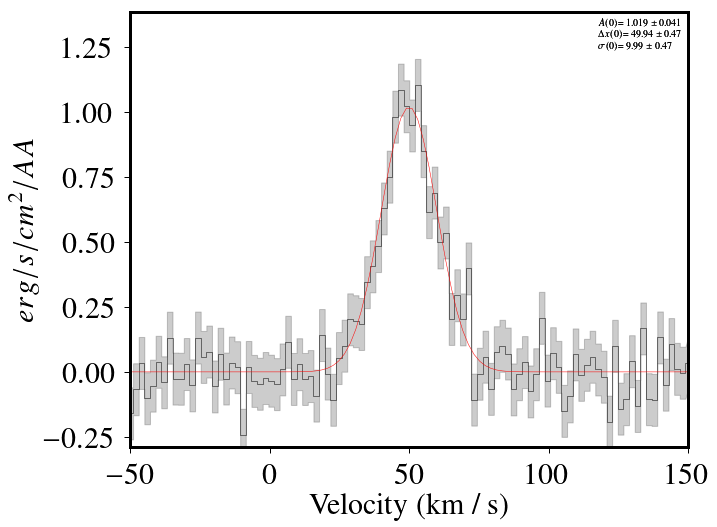

In [3]:
xaxis = np.linspace(-50,150,100.)
sigma = 10.
center = 50.
synth_data = np.exp(-(xaxis-center)**2/(sigma**2 * 2.))

# Add noise
stddev = 0.1
noise = np.random.randn(xaxis.size)*stddev
error = stddev*np.ones_like(synth_data)
data = noise+synth_data

# this will give a "blank header" warning, which is fine
sp = pyspeckit.Spectrum(data=data, error=error, xarr=xaxis,
                        xarrkwargs={'unit':'km/s'},
                        unit='$erg/s/cm^2/AA$')

sp.plotter()

# Fit with automatic guesses
sp.specfit(fittype='gaussian')

# Fit with input guesses
# The guesses initialize the fitter
# This approach uses the 0th, 1st, and 2nd moments
amplitude_guess = data.max()
print amplitude_guess
center_guess = (data*xaxis).sum()/data.sum()
print center_guess
width_guess = (data.sum() / amplitude_guess / (2*np.pi))**0.5
print width_guess
guesses = [amplitude_guess, center_guess, width_guess]
sp.specfit(fittype='gaussian', guesses=guesses)

sp.plotter(errstyle='fill')
sp.specfit.plot_fit()

# Adapt the example above and gaussian fit to one line, e.g. [OII] 3727

AF: I can not make it work

divide by zero encountered in divide


amplitude_guess : 21.454401
center_guess : 3727.3398
width_guess : 1.8432857876270348


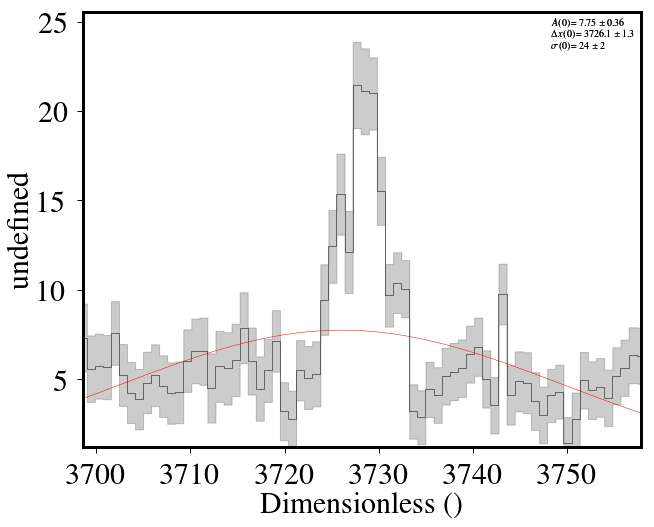

In [4]:
# Initialize pyspeckit spectrum object
hdulist = pyfits.open('spec-0271-51883-0492.fits')

flux_spe=hdulist[1].data['flux']
sig2=1./hdulist[1].data['ivar']
red=hdulist[2].data['Z']
lamb=(10**hdulist[1].data['loglam'])/(1+red)


# Initialize spectrum object and plot region surrounding Halpha-[NII] complex
spec = pyspeckit.Spectrum(data=flux_spe, error=np.sqrt(sig2), xarr=lamb, xarrkwargs={'unit':'angstroms'})
#spec.plotter(xmin=OII-30. ,xmax= OII+30., ymin = 0, ymax = 40)


# define wavelength of OII line
OII = 3728.48  

# select the spectra in a window of 30 A around OII3727
xaxis = lamb[(lamb>OII-30.) & (lamb<OII+30.)]
data = flux_spe[(lamb>OII-30.) & (lamb<OII+30.)]
err = np.sqrt(sig2[(lamb>OII-30.) & (lamb<OII+30.)])

# this will give a "blank header" warning, which is fine
sp = pyspeckit.Spectrum(data=data, error=err, xarr=xaxis)

sp.plotter()

# Fit with automatic guesses
#sp.specfit(fittype='gaussian')

# Fit with input guesses
# The guesses initialize the fitter
# This approach uses the 0th, 1st, and 2nd moments
amplitude_guess = data.max()
print 'amplitude_guess :', amplitude_guess
center_guess = (data*xaxis).sum()/data.sum()
print 'center_guess :', center_guess
width_guess = (data.sum() / amplitude_guess / (2*np.pi))**0.5
print 'width_guess :', width_guess
guesses = [amplitude_guess, center_guess, width_guess]
sp.specfit(fittype='gaussian', guesses=guesses)

sp.plotter(errstyle='fill')
sp.specfit.plot_fit()

The same problem for the line [OIII] 5007


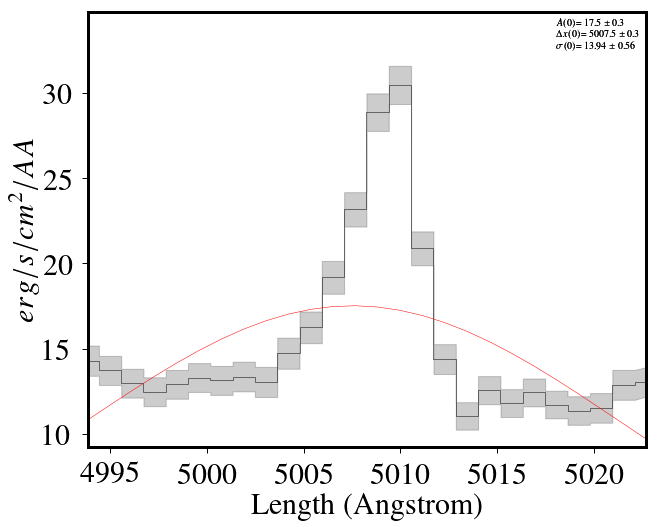

In [5]:
# wavelength of the OIII line
OIIIc = 5008.24

# select the spectra in a window of 30 A around [OIII]5007
xaxis = lamb[(lamb>OIIIc-15.) & (lamb<OIIIc+15.)]
data = flux_spe[(lamb>OIIIc-15.) & (lamb<OIIIc+15.)]
err = np.sqrt(sig2[(lamb>OIIIc-15.) & (lamb<OIIIc+15.)])

# this will give a "blank header" warning, which is fine
sp = pyspeckit.Spectrum(data=data, error=err, xarr=xaxis, xarrkwargs={'unit':'angstroms'},
                        unit='$erg/s/cm^2/AA$')

sp.plotter()

# Fit with automatic guesses
sp.specfit(fittype='gaussian')

# Fit with input guesses
# The guesses initialize the fitter
# This approach uses the 0th, 1st, and 2nd moments
amplitude_guess = data.max()
center_guess = (data*xaxis).sum()/data.sum()
width_guess = (data.sum() / amplitude_guess / (2*np.pi))**0.5
guesses = [amplitude_guess, center_guess, width_guess]
sp.specfit(fittype='gaussian', guesses=guesses)

sp.plotter(errstyle='fill')
sp.specfit.plot_fit()

In [6]:
# Rest wavelengths of the lines we are fitting - use as initial guesses
OII = 3728.48  
NeIII = 3870.16  
HeII = 3889.73
Hdelta = 4102.89
Hgamma = 4341.68 
OIIIa = 4364.44
ArIV = 4740.
Hbeta = 4862.68
OIIIb = 4960.30 
OIIIc = 5008.24
HeI = 5877.25
OI = 6302.05
NIIa = 6549.86
Halpha = 6564.614
NIIb = 6585.27
SIIa = 6718.29
SIIb = 6732.68
ArIII = 7137.8 

# Multiple fitting to NII Halpha and SII

adapted from https://pyspeckit.readthedocs.io/en/latest/example_sdss.html

divide by zero encountered in divide


Line   Flux (erg/s/cm^2)     Amplitude (erg/s/cm^2)    FWHM (Angstrom)   Luminosity (erg/s)
('NIIa', {'pos': 6548.853967754935, 'modelerrs': [0.14018886680263853, 0.44323139895378133, 0.07156481454201966], 'flux': 2.0443041155837465e-16, 'amp': 3.250585163730965e-17, 'modelpars': [3.250585163730965, 6548.853967754935, 2.5089616319079275], 'fwhm': 5.90815314303035, 'lum': array([1.89083195e+39])})
('NIIa', 2.0443041155837465e-16, 3.250585163730965e-17, 5.90815314303035, array([1.89083195e+39]))
('H_alpha', {'pos': 6564.17111991698, 'modelerrs': [0.5357055768385094, 0.09419918484176126, 0.07156481454201966], 'flux': 1.0057786822776554e-15, 'amp': 1.5992577805259984e-16, 'modelpars': [15.992577805259982, 6564.17111991698, 2.5089616319079275], 'fwhm': 5.90815314303035, 'lum': array([9.30271799e+39])})
('H_alpha', 1.0057786822776554e-15, 1.5992577805259984e-16, 5.90815314303035, array([9.30271799e+39]))
('H_alpha_1', {'pos': 6564.17111991698, 'modelerrs': [0.06725924921890183, 0.09419918484

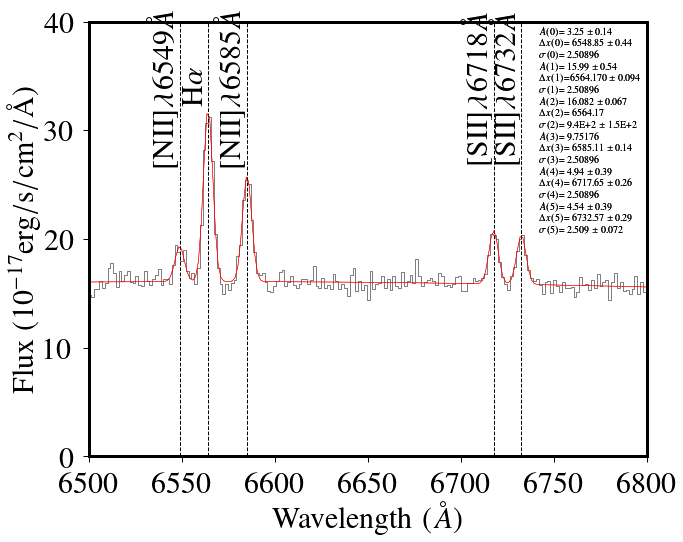

In [7]:
# Initialize pyspeckit spectrum object
hdulist = pyfits.open('spec-0271-51883-0492.fits')

flux_spe=hdulist[1].data['flux']
sig2=1./hdulist[1].data['ivar']
red=hdulist[2].data['Z']
lamb=(10**hdulist[1].data['loglam'])/(1+red)


# Initialize spectrum object and plot region surrounding Halpha-[NII] complex
spec = pyspeckit.Spectrum(data=flux_spe, error=np.sqrt(sig2), xarr=lamb, xarrkwargs={'unit':'angstroms'})
spec.plotter(xmin=6500.,xmax=6800., ymin = 0, ymax = 40)

# We fit the [NII] and [SII] doublets, and allow two components for Halpha.
# The widths of all narrow lines are tied to the widths of [SII].
guesses = [50, NIIa, 1, 100, Halpha, 1, 50, Halpha, 50, 50, NIIb, 1, 20, SIIa, 1, 20, SIIb, 1]
tied = ['', '', 'p[17]', '', '', 'p[17]', '', 'p[4]', '', '3 * p[0]', '',   'p[17]', '', '', 'p[17]', '', '', '']

# We fit the [NII] and [SII] doublets, and allow two components for Halpha.
# The widths of all narrow lines are tied to the widths of [SII].
#guesses = [50, NIIa, 5, 100, Halpha, 5, 50, Halpha, 50, 50, NIIb, 5, 20, SIIa, 5, 20, SIIb, 5]
#tied = ['', '', 'p[17]', '', '', 'p[17]', '', 'p[4]', '', '3 * p[0]', '',   'p[17]', '', '', 'p[17]', '', '', '']


# Actually do the fit.
spec.specfit(guesses = guesses, tied = tied, annotate = False)
spec.plotter.refresh()

# Let's use the measurements class to derive information about the emission
# lines.  The galaxy's redshift and the flux normalization of the spectrum
# must be supplied to convert measured fluxes to line luminosities.  If the
# spectrum we loaded in FITS format, 'BUNITS' would be read and we would not
# need to supply 'fluxnorm'.
spec.measure(z = red, fluxnorm = 1e-17)

y = spec.plotter.ymax * 0.85    # Location of annotations in y

for i, line in enumerate(spec.measurements.lines.keys()):

    # If this line is not in our database of lines, don't try to annotate it
    if line not in spec.speclines.optical.lines.keys(): continue

    x = spec.measurements.lines[line]['modelpars'][1]   # Location of the emission line
    # Draw dashed line to mark its position
    spec.plotter.axis.plot([x]*2, [spec.plotter.ymin, spec.plotter.ymax],
                           ls='--', color='k')
    # Label it
    spec.plotter.axis.annotate(spec.speclines.optical.lines[line][-1], (x, y),
                               rotation = 90, ha = 'right', va = 'center')
# Make some nice axis labels
spec.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
spec.plotter.axis.set_ylabel(r'Flux $(10^{-17} \mathrm{erg/s/cm^2/\AA})$')
spec.plotter.refresh()

# Print out spectral line information
print("Line   Flux (erg/s/cm^2)     Amplitude (erg/s/cm^2)"
      "    FWHM (Angstrom)   Luminosity (erg/s)")
for line in spec.measurements.lines.keys():
    print(line, spec.measurements.lines[line])
    print(line, spec.measurements.lines[line]['flux'],
          spec.measurements.lines[line]['amp'],
          spec.measurements.lines[line]['fwhm'],
          spec.measurements.lines[line]['lum'])

# Had we not supplied the objects redshift (or distance), the line
# luminosities would not have been measured, but integrated fluxes would
# still be derived.  Also, the measurements class separates the broad and
# narrow H-alpha components, and identifies which lines are which. How nice!

spec.specfit.plot_fit()


# Save the figure
#spec.plotter.figure.savefig("sdss_fit_example.png")

# Add [OIII]5007

divide by zero encountered in divide


Line   Flux (erg/s/cm^2)     Amplitude (erg/s/cm^2)    FWHM (Angstrom)   Luminosity (erg/s)
('OIIIb', {'pos': 5009.117385558407, 'modelerrs': [0.8416391462269005, 0.08435554250254776, 0.08162422698173954], 'flux': 6.994217711604522e-16, 'amp': 1.725197558538788e-16, 'modelpars': [17.25197558538788, 5009.117385558407, 1.6173737029021324], 'fwhm': 3.808624015899873, 'lum': array([6.46914038e+39])})
('OIIIb', 6.994217711604522e-16, 1.725197558538788e-16, 3.808624015899873, array([6.46914038e+39]))
('NIIa', {'pos': 6548.8744071754345, 'modelerrs': [0.4131743336636155, 0.5356937509096634, 0.5033621582184042], 'flux': 2.529029128252266e-16, 'amp': 3.092159429869106e-17, 'modelpars': [3.0921594298691057, 6548.8744071754345, 3.262886893478567], 'fwhm': 7.683511461432094, 'lum': array([2.33916717e+39])})
('NIIa', 2.529029128252266e-16, 3.092159429869106e-17, 7.683511461432094, array([2.33916717e+39]))
('H_alpha', {'pos': 6564.174120089888, 'modelerrs': [0.579840302731614, 0.09169790911074778, 0

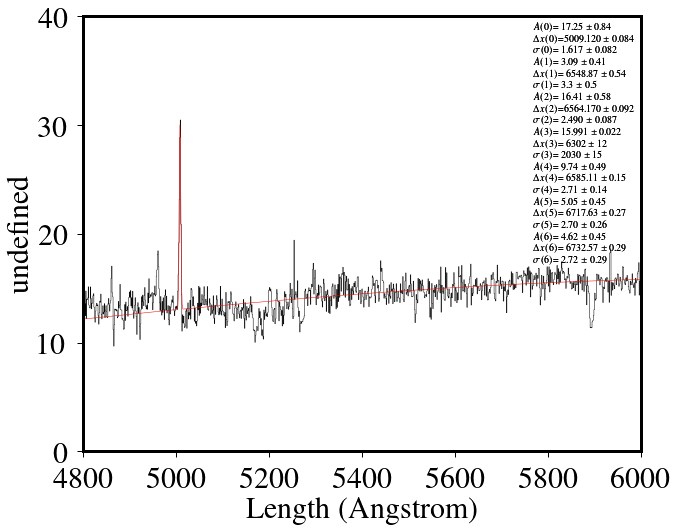

In [8]:

# Initialize pyspeckit spectrum object
hdulist = pyfits.open('spec-0271-51883-0492.fits')

flux_spe=hdulist[1].data['flux']
sig2=1./hdulist[1].data['ivar']
red=hdulist[2].data['Z']
lamb=(10**hdulist[1].data['loglam'])/(1+red)


# Initialize spectrum object and plot region surrounding Halpha-[NII] complex
spec = pyspeckit.Spectrum(data=flux_spe, error=np.sqrt(sig2), xarr=lamb, xarrkwargs={'unit':'angstroms'})
spec.plotter(xmin=3000., xmax=7000., ymin = 0, ymax = 40)

# We fit the [NII] and [SII] doublets, and allow two components for Halpha.
# The widths of all narrow lines are tied to the widths of [SII].
guesses = [50, OIIIc, 1, 50, NIIa, 5, 100, Halpha, 5, 50, Halpha, 50, 50, NIIb, 5, 20, SIIa,
           1, 20, SIIb, 1]
tied = ['', '', '', 'p[20]', '', '', 'p[20]', '', 'p[7]', '', '3 * p[3]', '',
        'p[20]', '', '', 'p[20]', '', '', '']


# Actually do the fit.
spec.specfit(guesses = guesses, annotate = False)
spec.plotter.refresh()

# Let's use the measurements class to derive information about the emission
# lines.  The galaxy's redshift and the flux normalization of the spectrum
# must be supplied to convert measured fluxes to line luminosities.  If the
# spectrum we loaded in FITS format, 'BUNITS' would be read and we would not
# need to supply 'fluxnorm'.
spec.measure(z = red, fluxnorm = 1e-17)

y = spec.plotter.ymax * 0.85    # Location of annotations in y


for i, line in enumerate(spec.measurements.lines.keys()):

    # If this line is not in our database of lines, don't try to annotate it
    if line not in spec.speclines.optical.lines.keys(): continue

    x = spec.measurements.lines[line]['modelpars'][1]   # Location of the emission line
    # Draw dashed line to mark its position
    spec.plotter.axis.plot([x]*2, [spec.plotter.ymin, spec.plotter.ymax],
                           ls='--', color='k')
    # Label it
    spec.plotter.axis.annotate(spec.speclines.optical.lines[line][-1], (x, y),
                               rotation = 90, ha = 'right', va = 'center')
# Make some nice axis labels
spec.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
spec.plotter.axis.set_ylabel(r'Flux $(10^{-17} \mathrm{erg/s/cm^2/\AA})$')
spec.plotter.refresh()

# Print out spectral line information
print("Line   Flux (erg/s/cm^2)     Amplitude (erg/s/cm^2)"
      "    FWHM (Angstrom)   Luminosity (erg/s)")
for line in spec.measurements.lines.keys():
    print(line, spec.measurements.lines[line])
    print(line, spec.measurements.lines[line]['flux'],
          spec.measurements.lines[line]['amp'],
          spec.measurements.lines[line]['fwhm'],
          spec.measurements.lines[line]['lum'])

# Had we not supplied the objects redshift (or distance), the line
# luminosities would not have been measured, but integrated fluxes would
# still be derived.  Also, the measurements class separates the broad and
# narrow H-alpha components, and identifies which lines are which. How nice!
spec.plotter(xmin=4800., xmax=6000., ymin = 0, ymax = 40)
spec.specfit.plot_fit()


# Save the figure
#spec.plotter.figure.savefig("sdss_fit_example.png")


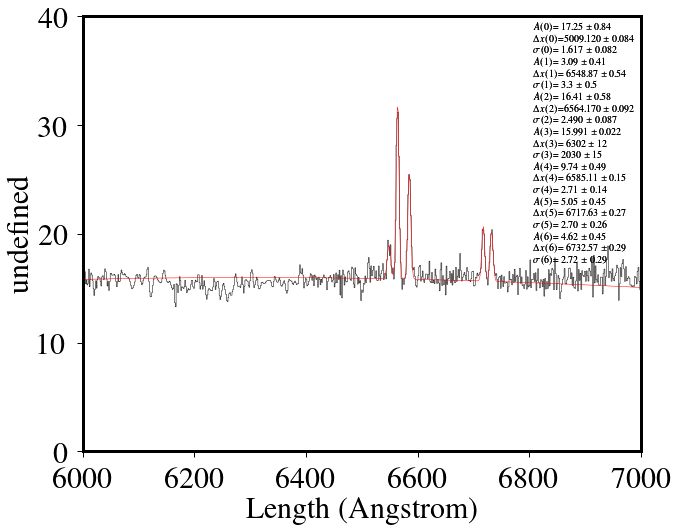

In [9]:
spec.plotter(xmin=6000., xmax=7000., ymin = 0, ymax = 40)
spec.specfit.plot_fit()

# Adaptation from this other example

https://github.com/pyspeckit/pyspeckit/blob/master/examples/agn_example.py

AF: I can not make it work. 

divide by zero encountered in divide


INFO: Left region selection unchanged.  xminpix, xmaxpix: 2712,2748 [pyspeckit.spectrum.interactive]


Line   Pos   Flux (erg/s/cm^2)    FWHM (Angstrom)   Luminosity (erg/s)   Amplitude
unknown_1 6516.171233191562 2.8742631959637834e-15 134.00060958082508 [2.65848346e+40] 2.0150579937877874e-17
unknown_2 6530.925233191562 1.808854541106334e-14 134.00060958082508 [1.6730583e+41] 1.2681325801249223e-16
NIIa 6551.581233191562 8.622789587891351e-15 134.00060958082508 [7.97545039e+40] 6.045173981363363e-17
unknown_3 6684.601233191563 0.0 134.00060958082508 [0.] 0.0
unknown_4 6698.991233191562 2.6445427564095204e-14 134.00060958082508 [2.44600884e+41] 1.8540080214991346e-16
unknown_5 6530.925233191562 0.0 124.08312195085175 [0.] 0.0
unknown_6 6530.925233191562 0.0 14.475783826780516 [0.] 0.0


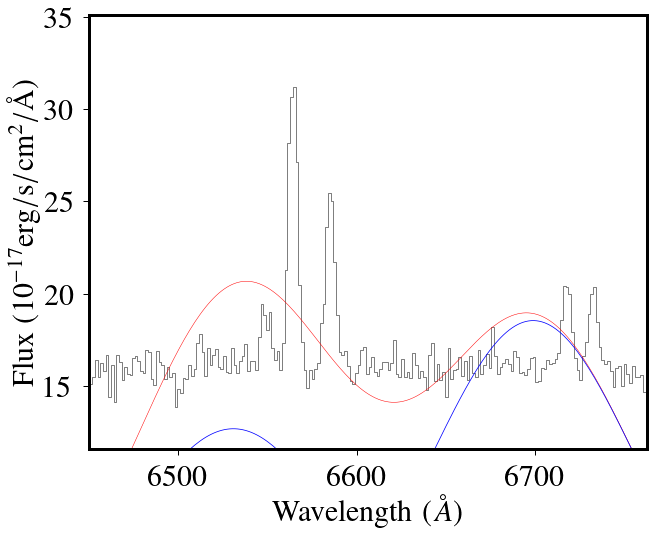

In [10]:
from __future__ import print_function
# Test measurements class on an SDSS AGN spectrum

import pyspeckit
import astropy.units as u
import numpy as np

# Some lines
Hbeta = 4862.721
OIIIa = 4960.295
OIIIb = 5008.239
NIIa = 6549.86
Halpha = 6564.614
NIIb = 6585.27
SIIa = 6718.29
SIIb = 6732.68

# Offsets between SII lines in each complex
SIIb_off = SIIb - SIIa
OIIIb_off = OIIIb - OIIIa
NIIa_off_Ha = NIIa - Halpha
NIIb_off_Ha = NIIb - Halpha
SIIa_off_Ha = SIIa - Halpha 
SIIb_off_Ha = SIIb - Halpha 

# Guesses
narrow = 5.
broad = 30.

# Initialize pyspeckit spectrum object
hdulist = pyfits.open('spec-0271-51883-0492.fits')

flux_spe=hdulist[1].data['flux']
sig2=1./hdulist[1].data['ivar']
red=hdulist[2].data['Z']
lamb=(10**hdulist[1].data['loglam'])/(1+red)

# Initialize spectrum object and plot region surrounding Halpha-[NII] complex
spec = pyspeckit.Spectrum(data=flux_spe, error=np.sqrt(sig2), xarr=lamb, xarrkwargs={'unit':'angstroms'})
spec.unit = 'erg s-1 cm-2 A-1'
spec.xarr.set_unit = u.dimensionless_unscaled # need to put the real scaling

# H-alpha
spec.specfit.selectregion(xmin = Halpha - 5, xmax = Halpha + 5)
ampHa = np.max(spec.data[spec.specfit.xmin:spec.specfit.xmax])

# SII
spec.specfit.selectregion(xmin = SIIa - 20, xmax = SIIb + 20)
smallamp = np.max(spec.data[spec.specfit.xmin:spec.specfit.xmax])    

spec.specfit(guesses = [smallamp, SIIa, narrow, smallamp, SIIb, narrow],
        tied=['', '', 'p[-1]', '', 'p[1] + {0}'.format(SIIb_off), ''],
        negamp=False, quiet=True, multifit=None, show_components=True)
    
ampSIIa, lamSIIa, sigmaSII, ampSIIb, lamSIIb, sigmaSII = spec.specfit.modelpars

opz = lamSIIa / SIIa    # Calculate (1 + z)

# Now, use SII/OIII fit information to help fit NII-Halpha complex
spec.specfit.selectregion(xmin = NIIa - 100, xmax = NIIb + 100)

guesses = [2 * smallamp, NIIa * opz, sigmaSII, ampHa, Halpha * opz, sigmaSII,
          6 * smallamp, NIIb * opz, sigmaSII,
          ampSIIa, lamSIIa, sigmaSII, ampSIIb, lamSIIb, sigmaSII]
tied = ['', 'p[4] + {0}'.format(NIIa_off_Ha), 'p[{0}]'.format(len(guesses) - 1), 
        '', '', 'p[{0}]'.format(len(guesses) - 1), 
        '3 * p[0]', 'p[4] + {0}'.format(NIIb_off_Ha), 'p[{0}]'.format(len(guesses) - 1),
        '', 'p[4] + {0}'.format(SIIa_off_Ha), 'p[{0}]'.format(len(guesses) - 1), 
        '', 'p[4] + {0}'.format(SIIb_off_Ha), '']                                                
fixed = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

minp = []
maxp = []
lmin = []
lmax = []
for i, element in enumerate(guesses):
    minp.append(element - 0.2 * element)
    maxp.append(element + 0.2 * element)

    # Don't limit amplitude
    if i % 3 == 0:
        lmin.append(False)
        lmax.append(False)
    else:
        lmin.append(True)
        lmax.append(True)
        
# Plot, and do final fit
spec.plotter(xmin = NIIa - 100, xmax = SIIb + 30)

spec.specfit(guesses=guesses, tied=tied, fixed=fixed, negamp=False,
        limitedmin=lmin, limitedmax=lmax, minpars=minp, maxpars=maxp,
        show_components=True)
    
guesses.extend([50, Halpha * opz, 50])
tied.extend(['', 'p[4]', ''])
fixed.extend([0, 0, 0]) 

lmin.extend([True, False, False])
lmax.extend([False, False, False])
minp.extend([0, 0, 0]) 
maxp.extend([0, 0, 0]) 

spec.specfit(guesses = guesses, tied = tied, fixed = fixed, negamp = False,
    limitedmin = lmin, limitedmax = lmax, minpars = minp, maxpars = maxp)

guesses.extend([10, Halpha * opz, 25])
tied.extend(['', 'p[4]', ''])
fixed.extend([0, 0, 0])   

lmin.extend([True, False, False])
lmax.extend([False, False, False])
minp.extend([0, 0, 0]) 
maxp.extend([0, 0, 0])                                 

spec.plotter(xmin=NIIa - 100, xmax=SIIb + 30)

spec.specfit(guesses=guesses, tied=tied, fixed=fixed, negamp=False,
    limitedmin=lmin, limitedmax=lmax, minpars=minp, maxpars=maxp, annotate=False,
    show_components=True)
    
spec.plotter.refresh()

spec.measure(z = red, fluxnorm = 1e-17)

# Overplot positions of lines and annotate
#y = spec.plotter.ymax * 0.85
#for i, line in enumerate(spec.measurements.lines.keys()):
#    x = spec.measurements.lines[line]['modelpars'][1]
#    spec.plotter.axis.plot([x]*2, [spec.plotter.ymin.value, spec.plotter.ymax.value], ls = '--', color = 'k')
#    try: spec.plotter.axis.annotate(spec.speclines.optical.lines[line][-1], 
#        (x, y), rotation = 90, ha = 'right', va = 'center')
#    except KeyError: pass

spec.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
spec.plotter.axis.set_ylabel(r'Flux $(10^{-17} \mathrm{erg/s/cm^2/\AA})$')

spec.plotter.refresh()

print("Line   Pos   Flux (erg/s/cm^2)    FWHM (Angstrom)   Luminosity (erg/s)   Amplitude")
for line in spec.measurements.lines.keys():
    print(line, spec.measurements.lines[line]['pos'],
          spec.measurements.lines[line]['flux'],
          spec.measurements.lines[line]['fwhm'],
          spec.measurements.lines[line]['lum'],
spec.measurements.lines[line]['amp'])

# STILL MISSING: HOW DO WE COMPUTE THE ERROR?